# California Regression

**Author**: Ryan Murillo

## Loading the data

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# loading in dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

## Exploring the data

In [2]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# renaming the target column
df.rename(columns={"MedHouseVal": "target"}, inplace=True)

In [4]:
# Checking data to see if there are any nulls and if data transformation needs to occur
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
# creating my X and y variables that will remove the target from the training data and isolate the target in the y variable
X = df.drop("target", axis=1)
y = df["target"]

In [6]:
#Checking to make sure target is removed from training data
print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


## Training the Model

In [7]:
from sklearn.model_selection import train_test_split

# splitting the data 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Checking to make sure data has been split correctly
print(X_train.shape)
print(X_test.shape)

(16512, 8)
(4128, 8)


## Linear Regression Algorithm

In [8]:
from sklearn.preprocessing import StandardScaler

# evenly scale the data to avoid overemphasis
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
from sklearn.linear_model import LinearRegression

#initalizing the model
model = LinearRegression()

In [10]:
# training the model 
model.fit(X_train_scaled, y_train)

# creating y_pred varibale which will be the models prediction of the X_test output which is y_test
y_pred_linear = model.predict(X_test_scaled)

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# calculate the rooted mean squared error by taking it and square rooting it which will penalize the prediction (y_pred) that is farther away from the actual output (y_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

# printing the calculated rmse and r2 to 2 decimal points
print(f"RMSE: {rmse_linear:.2f}")
print(f"r2 score: {r2_linear:.2f}")

RMSE: 0.75
r2 score: 0.58


## Decision Tree Algorthm

In [12]:
from sklearn.preprocessing import StandardScaler

# evenly scale the data to avoid overemphasis
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.tree import DecisionTreeRegressor

# initializing the decision tree regressor model
model_tree = DecisionTreeRegressor(random_state = 42)

# training the tree model on the majority data
model_tree.fit(X_train_scaled, y_train)

# creating the prediction variable again that will compare itself to the outout of X_text (y_test)
y_pred_tree = model_tree.predict(X_test_scaled)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# calculate the rooted mean squared error by taking it and square rooting it which will penalize the prediction (y_pred) that is farther away from the actual output (y_test)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
r2_tree = r2_score(y_test, y_pred_tree)

# printing the calculated rmse and r2 to 2 decimal points
print(f"RMSE: {rmse_tree:.2f}")
print(f"r2 score: {r2_tree:.2f}")

RMSE: 0.71
r2 score: 0.62


## Visualizing the data

Linear Regression Visualization

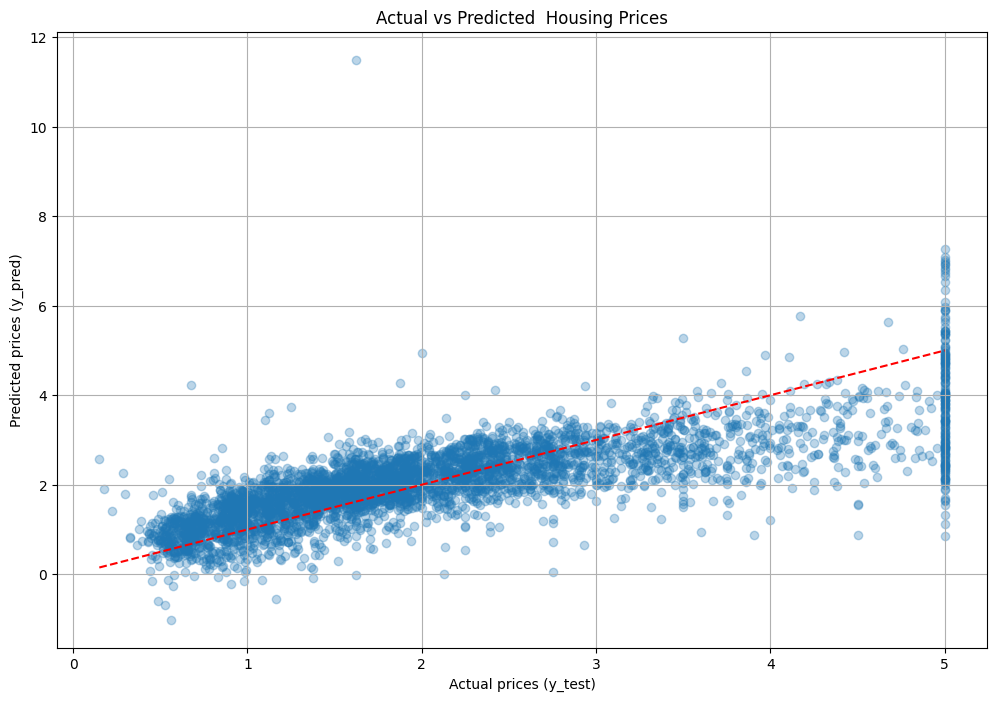

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred_linear, alpha=0.3) # takes in the actual output and the prediction
plt.title("Actual vs Predicted  Housing Prices")
plt.xlabel("Actual prices (y_test)")
plt.ylabel("Predicted prices (y_pred)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # the line which the predictions are being measured against
plt.grid(True)
plt.show()

Decision Tree Visualization

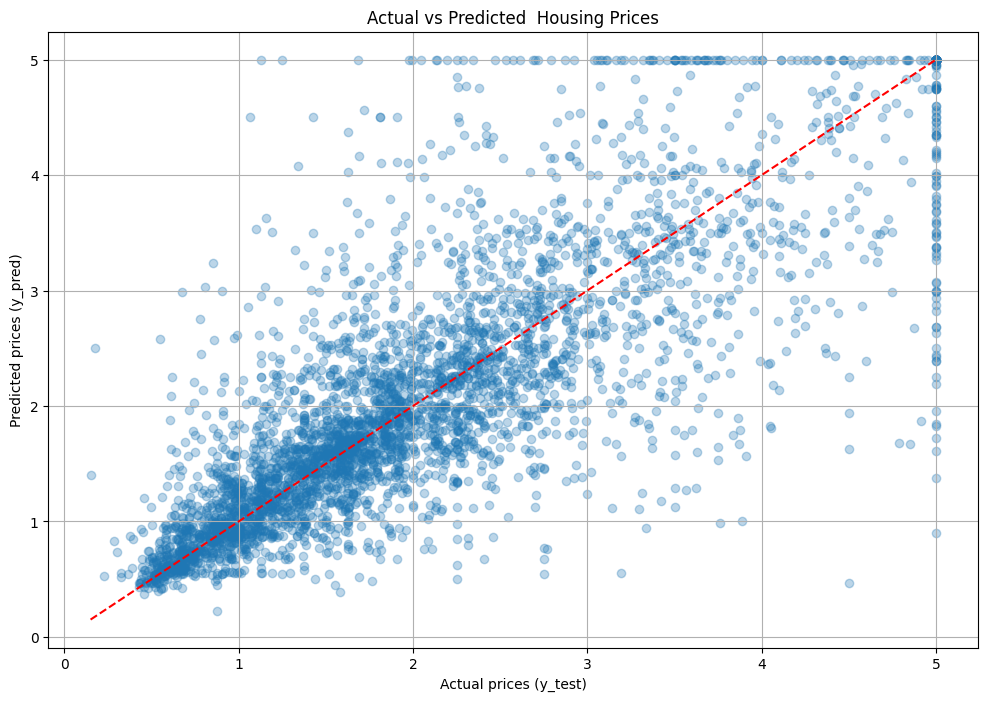

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred_tree, alpha=0.3) # takes in the actual output and the prediction
plt.title("Actual vs Predicted  Housing Prices")
plt.xlabel("Actual prices (y_test)")
plt.ylabel("Predicted prices (y_pred)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # the line which the predictions are being measured against
plt.grid(True)
plt.show()

In [18]:
# Use mean_squared_error with squared=False to get RMSE
print(f"RMSE_Linear: {rmse_linear:.2f}")
print(f"r2 score_linear: {r2_linear:.2f}")
print(f"RMSE_tree: {rmse_tree:.2f}")
print(f"r2 score_tree: {r2_tree:.2f}")

RMSE_Linear: 0.75
r2 score_linear: 0.58
RMSE_tree: 0.71
r2 score_tree: 0.62


## Comments on Algorithms

* The Decision Tree algorithm perfomed better with a lower rmse (0.71) vs the Linear Regression algorithm (0.75).
* The Decision Tree model had a lower RMSE than Linear Regression, but may overfit due to its flexibility. Linear models may generalize better on new data.